In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os
import urllib.request
import tarfile
import gzip
import shutil

url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz"
urllib.request.urlretrieve(url, "housing.tgz")

with tarfile.open("housing.tgz", "r:gz") as tar:
    tar.extractall()
shutil.move("housing.csv", "housing.csv.gz")
with open("housing.csv.gz", "rb") as f_in, gzip.open("housing.csv", "wb") as f_out:
    shutil.copyfileobj(f_in, f_out)
    
df = pd.read_csv("housing.csv", compression='gzip', encoding='latin1')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
print(df.value_counts('ocean_proximity'))

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64


In [6]:
df['ocean_proximity'].describe()

count         20640
unique            5
top       <1H OCEAN
freq           9136
Name: ocean_proximity, dtype: object

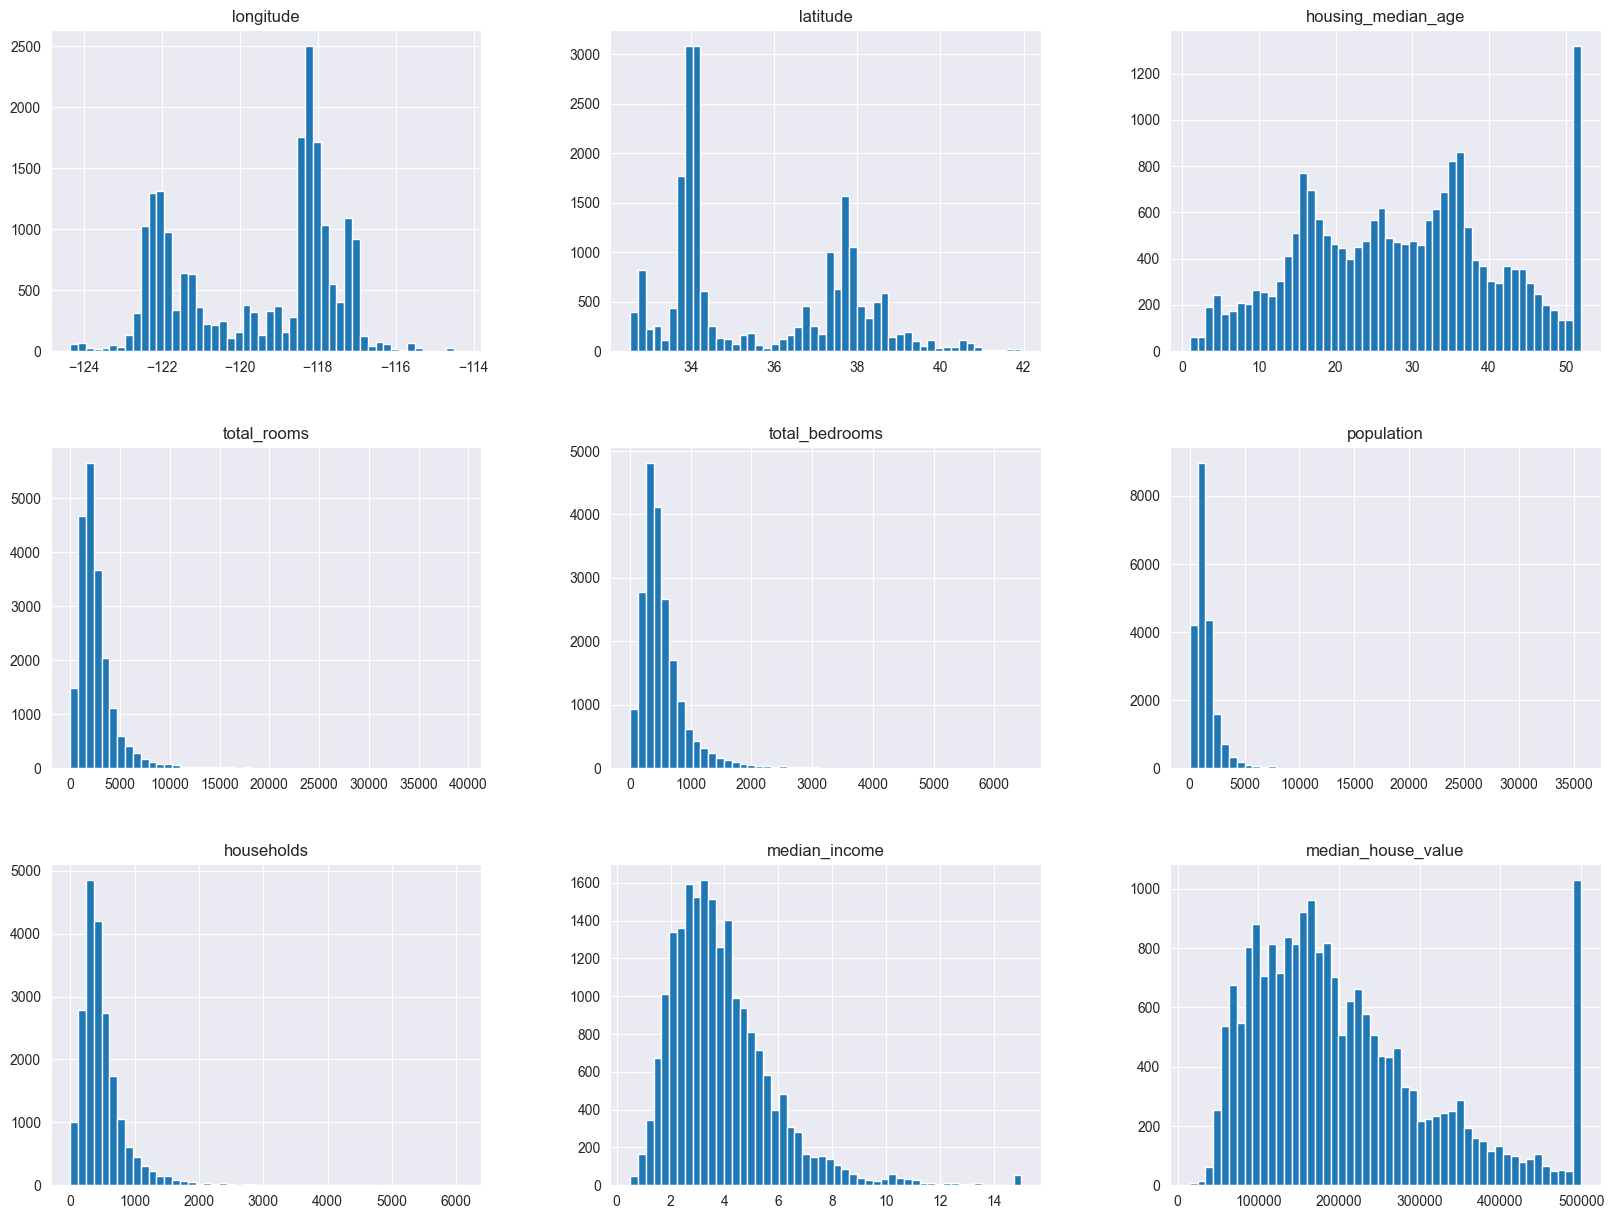

In [7]:
df.hist(bins=50, figsize=(20,15))
plt.savefig('obraz1.png')

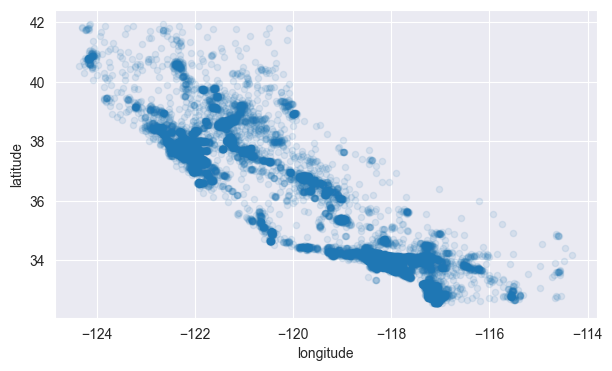

In [8]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1, figsize=(7,4))
plt.savefig("obraz2.png")

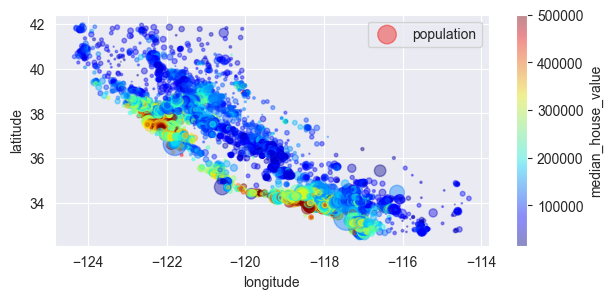

In [9]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, figsize=(7,3), colorbar=True,
        s=df["population"]/100, label="population", c="median_house_value", cmap=plt.get_cmap("jet"))
plt.savefig("obraz3.png")

In [10]:
df.corr(numeric_only=True)["median_house_value"].reset_index().rename(columns={'index': 'atrybut',
                                                                               'median_house_value': 'wspolczynnik_korelacji'}).to_csv('korelacja.csv', index=False)



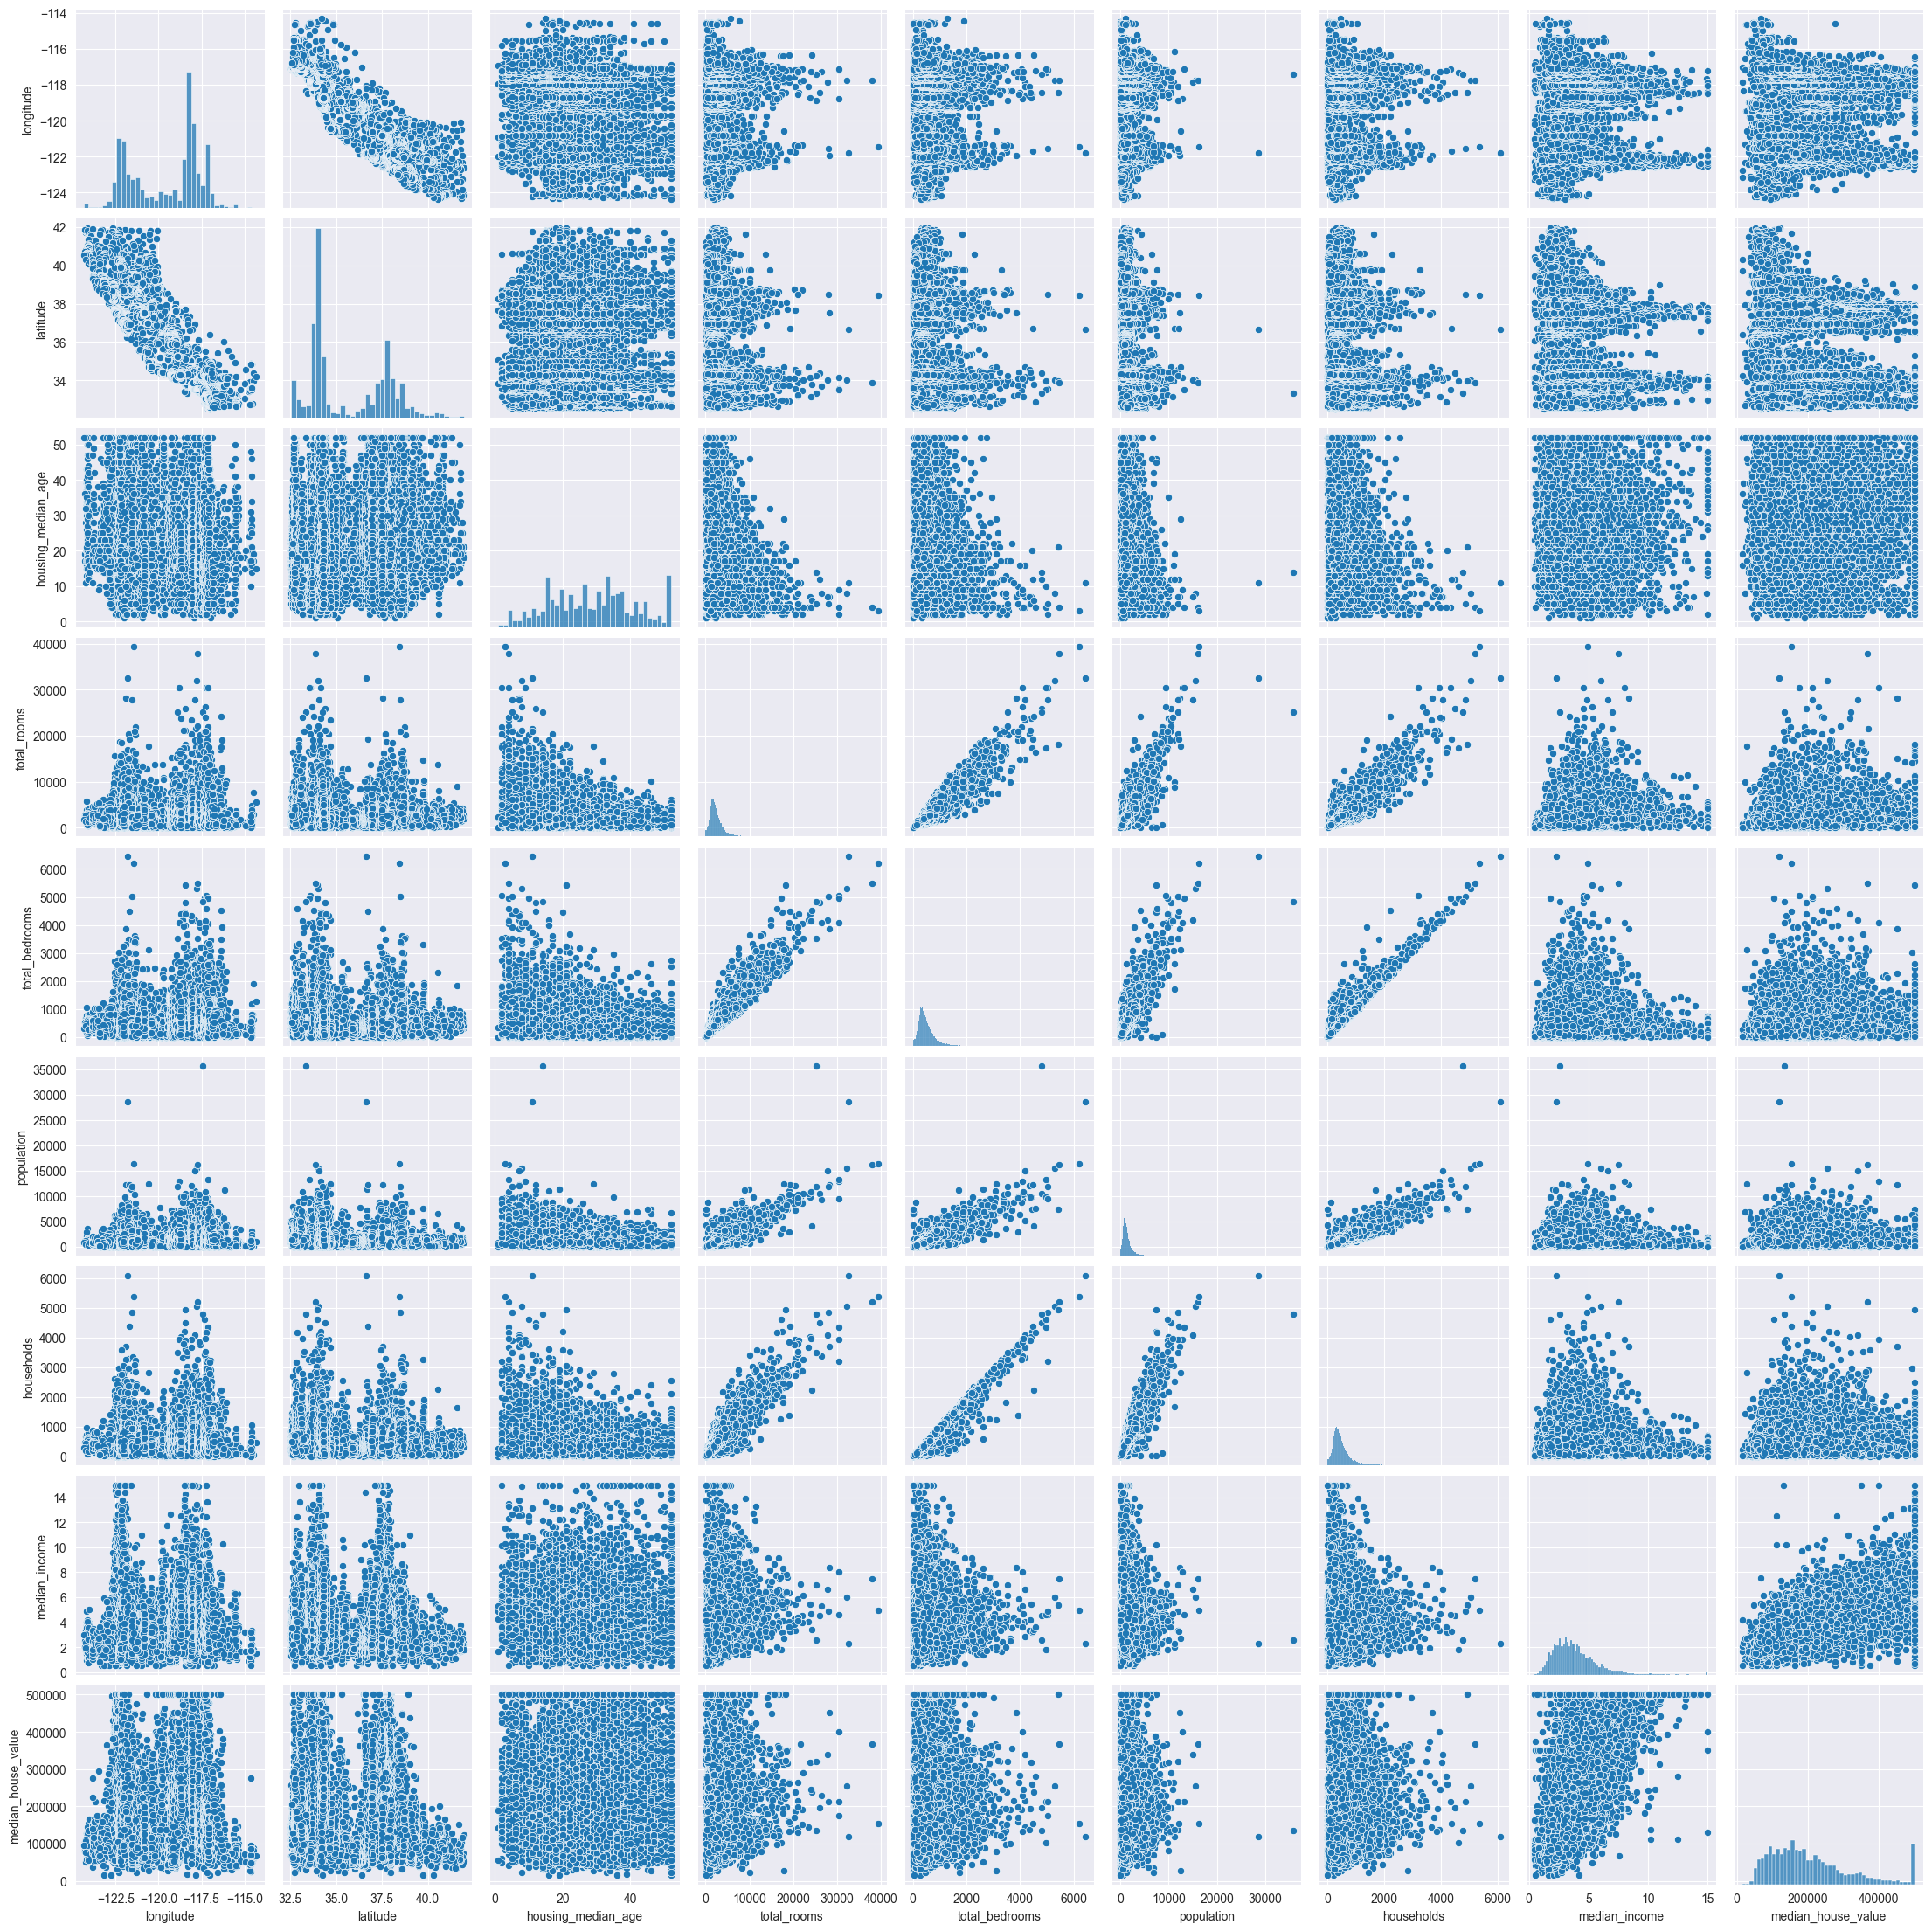

In [11]:
import seaborn as sns
sns.pairplot(df)

In [12]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
len(train_set), len(test_set)

(16512, 4128)

In [13]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND


In [14]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


In [15]:
train_set.corr(numeric_only=True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924485,-0.101818,0.038676,0.063064,0.094276,0.049306,-0.017040,-0.046349
latitude,-0.924485,1.000000,0.005296,-0.029224,-0.059998,-0.102499,-0.064061,-0.076571,-0.142983
housing_median_age,-0.101818,0.005296,1.000000,-0.360922,-0.320624,-0.292283,-0.302796,-0.121711,0.103706
total_rooms,0.038676,-0.029224,-0.360922,1.000000,0.930489,0.857936,0.920482,0.198268,0.133989
total_bedrooms,0.063064,-0.059998,-0.320624,0.930489,1.000000,0.878932,0.980255,-0.009141,0.047980
population,0.094276,-0.102499,-0.292283,0.857936,0.878932,1.000000,0.907452,0.004122,-0.026032
households,0.049306,-0.064061,-0.302796,0.920482,0.980255,0.907452,1.000000,0.012776,0.063714
median_income,-0.017040,-0.076571,-0.121711,0.198268,-0.009141,0.004122,0.012776,1.000000,0.690647
median_house_value,-0.046349,-0.142983,0.103706,0.133989,0.047980,-0.026032,0.063714,0.690647,1.000000


In [16]:
test_set.corr(numeric_only=True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925351,-0.134397,0.068286,0.096782,0.122507,0.079220,-0.006921,-0.044062
latitude,-0.925351,1.000000,0.035154,-0.063542,-0.095777,-0.134640,-0.098654,-0.093560,-0.149295
housing_median_age,-0.134397,0.035154,1.000000,-0.362596,-0.319843,-0.312528,-0.303429,-0.107897,0.113585
total_rooms,0.068286,-0.063542,-0.362596,1.000000,0.929952,0.854351,0.910780,0.197011,0.134697
total_bedrooms,0.096782,-0.095777,-0.319843,0.929952,1.000000,0.873576,0.977659,-0.002008,0.056667
population,0.122507,-0.134640,-0.312528,0.854351,0.873576,1.000000,0.906830,0.007684,-0.019003
households,0.079220,-0.098654,-0.303429,0.910780,0.977659,0.906830,1.000000,0.013940,0.074249
median_income,-0.006921,-0.093560,-0.107897,0.197011,-0.002008,0.007684,0.013940,1.000000,0.677502
median_house_value,-0.044062,-0.149295,0.113585,0.134697,0.056667,-0.019003,0.074249,0.677502,1.000000


In [17]:
import pickle
with open ('train_set.pkl', 'wb') as train_file:
    pickle.dump(train_set, train_file)

with open ('test_set.pkl', 'wb') as test_file:
    pickle.dump(test_set, test_file)